In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from teleconnections import Teleconnection

In [3]:
model = 'ERA5'
exp = 'era5'
source = 'monthly'

model="FESOM"
exp="tco2559-ng5-cycle3"
source="lra-r100-monthly"

In [4]:
tc = Teleconnection(model, exp, source, 'ENSO', loglevel='WARNING')

2023-10-16 13:10:44 :: Teleconnection :: WARNING  -> No regridding will be performed
2023-10-16 13:10:44 :: Teleconnection :: WARNING  -> No time aggregation will be performed
2023-10-16 13:10:44 :: Teleconnection :: WARNING  -> No time aggregation will be performed


In [5]:
tc.evaluate_regression(rebuild=True)

2023-10-16 13:10:46 :: Teleconnection :: WARNING  -> No index has been calculated, trying to calculate
2023-10-16 13:10:46 :: Teleconnection :: WARNING  -> No retrieve has been performed, trying to retrieve


2023-10-16 13:10:47 :: eccodes :: WARNING  -> ShortName sst have multiple grib codes associated: ['34', '151159']
2023-10-16 13:10:47 :: eccodes :: WARNING  -> AQUA will take the first so that sst -> 34, please set up a correct fix if this does not look right
2023-10-16 13:10:47 :: eccodes :: WARNING  -> AQUA will take the first so that sst -> 34, please set up a correct fix if this does not look right


In [6]:
tc.regression

<xarray.DataArray 'sst' (lat: 180, lon: 360)>
dask.array<truediv, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    description:  sea surface temperature
    long_name:    Sea surface temperature
    units:        K
    history:      2023-05-30 20:07:37 variable derived by AQUA fixer;\n2023-0...
    paramId:      34
    cfVarName:    sst
    shortName:    sst
    derived:      sst
    factor:       1
    offset:       273.15
    src_units:    degC
    units_fixed:  1

In [7]:
from teleconnections.plots import plot_single_map

In [8]:
tc.regression.long_name

'Sea surface temperature'

;1m2023-10-16 13:11:51 :: plot_single_map :: DEBUG    -> Loading data in memory
;1m2023-10-16 13:11:51 :: plot_single_map :: DEBUG    -> Adding cyclic longitude
;1m2023-10-16 13:11:51 :: plot_single_map :: DEBUG    -> Setting figsize to (11, 8.5)
;1m2023-10-16 13:11:51 :: plot_single_map :: DEBUG    -> Setting vmin to -2.0833943824670853
;1m2023-10-16 13:11:51 :: plot_single_map :: DEBUG    -> Setting vmax to 2.0833943824670853
;1m2023-10-16 13:11:52 :: plot_single_map :: DEBUG    -> Adding coastlines
;1m2023-10-16 13:11:52 :: cbar get label :: DEBUG    -> Using long_name as colorbar label
;1m2023-10-16 13:11:52 :: cbar get label :: DEBUG    -> Adding units to colorbar label
;1m2023-10-16 13:11:52 :: plot_single_map :: DEBUG    -> Setting colorbar label to Sea surface temperature [K]
;1m2023-10-16 13:11:52 :: plot_single_map :: DEBUG    -> Setting colorbar ticks to be symmetrical
;1m2023-10-16 13:11:52 :: set map title :: DEBUG    -> Using long_name as map title
;1m2023-10-16 13:11:52 

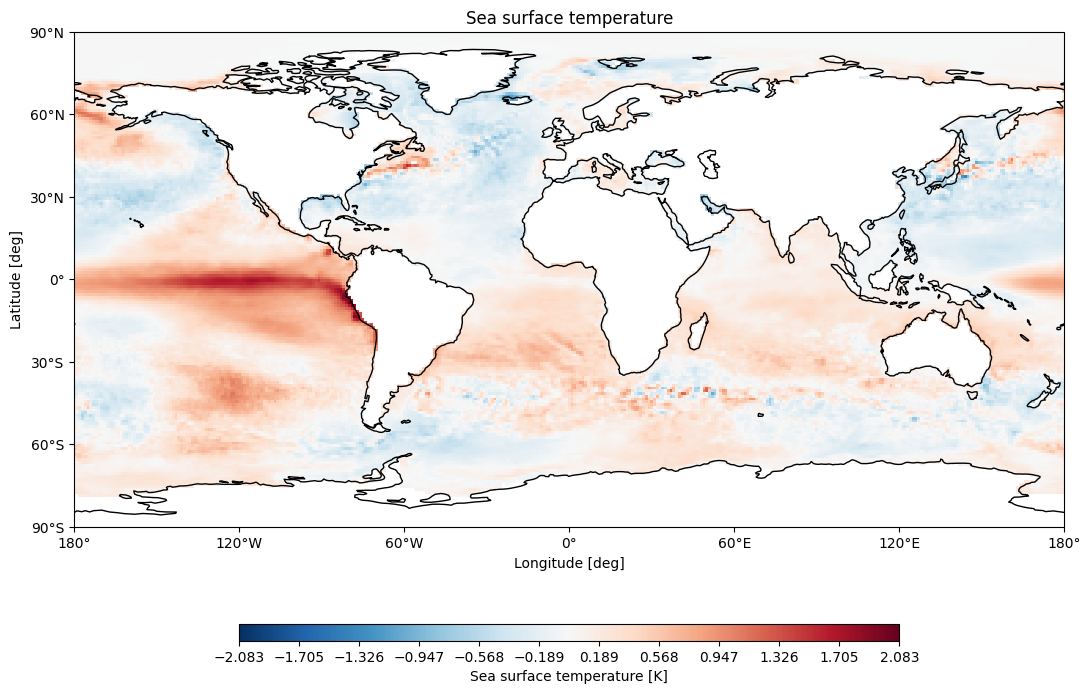

In [12]:
plot_single_map(data=tc.regression, loglevel='DEBUG', save=True, contour=False)